In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
store_train = pd.read_csv("C:/Users/h8man/Downloads/R_Projects/store_train.csv")

In [47]:
store_test = pd.read_csv("C:/Users/h8man/Downloads/R_Projects/store_test.csv")

In [48]:
store_train['data'] = 'train'

In [49]:
store_test['data'] = 'test'

In [50]:
store = pd.concat([store_train,store_test],axis = 0)

In [51]:
store.head()

,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type,store,data
0,2300919770,848,588,666,1116,1133,9.0,23,19770,Hancock County,NCNTY23009N23009,"Hancock County, ME",Eastbrook town,423.0,ME,Supermarket Type1,0.0,train
1,5000129575,925,717,780,1283,1550,1.0,50,29575,Addison County,NCNTY50001N50001,"Addison County, VT",Granville town,298.0,VT,Supermarket Type1,0.0,train
2,2501308470,924,616,739,1154,1314,13.0,25,8470,Hampden County,METRO44140M44140,"Springfield, MA HUD Metro FMR Area",Brimfield town,3609.0,MA,Supermarket Type1,1.0,train
3,603599999,924,646,683,1292,1297,35.0,6,99999,Lassen County,NCNTY06035N06035,"Lassen County, CA",Lassen County,34895.0,CA,Supermarket Type3,0.0,train
4,5002760100,1017,730,735,1208,1326,27.0,50,60100,Windsor County,NCNTY50027N50027,"Windsor County, VT",Rochester town,1139.0,VT,Supermarket Type1,0.0,train


In [52]:
del store['Id']

In [53]:
store['countyname'].value_counts(dropna = False)

Washington County       105
Franklin County          89
Aroostook County         73
Middlesex County         71
Penobscot County         67
                       ... 
Uvalde County             1
Fisher County             1
Collingsworth County      1
DuPage County             1
Outagamie County          1
Name: countyname, Length: 1962, dtype: int64

In [54]:
store['countyname'].nunique()

1962

In [55]:
store.shape

(4769, 17)

In [56]:
store['Areaname'].value_counts(dropna = False)

Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area              114
Aroostook County, ME                                            73
Penobscot County, ME (part) HUD Metro FMR Area                  53
Hartford-West Hartford-East Hartford, CT HUD Metro FMR Area     51
Washington County, ME                                           49
                                                              ... 
Nantucket County, MA                                             1
Vinton County, OH                                                1
Casey County, KY                                                 1
Missoula, MT MSA                                                 1
Fremont County, ID                                               1
Name: Areaname, Length: 2572, dtype: int64

In [57]:
store['countytownname'].value_counts(dropna = False)

Washington County     27
Jefferson County      25
Jackson County        23
Lincoln County        22
Franklin County       21
                      ..
Routt County           1
Shackelford County     1
Hopedale town          1
Bernalillo County      1
Willington town        1
Name: countytownname, Length: 3176, dtype: int64

In [58]:
store.drop(['storecode','countytownname','Areaname','countyname'],axis = 1, inplace = True)

In [59]:
store.shape

(4769, 13)

In [60]:
store.dtypes

sales0           int64
sales1           int64
sales2           int64
sales3           int64
sales4           int64
country        float64
State            int64
CouSub           int64
population     float64
state_alpha     object
store_Type      object
store          float64
data            object
dtype: object

In [61]:
store.head()

,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,population,state_alpha,store_Type,store,data
0,848,588,666,1116,1133,9.0,23,19770,423.0,ME,Supermarket Type1,0.0,train
1,925,717,780,1283,1550,1.0,50,29575,298.0,VT,Supermarket Type1,0.0,train
2,924,616,739,1154,1314,13.0,25,8470,3609.0,MA,Supermarket Type1,1.0,train
3,924,646,683,1292,1297,35.0,6,99999,34895.0,CA,Supermarket Type3,0.0,train
4,1017,730,735,1208,1326,27.0,50,60100,1139.0,VT,Supermarket Type1,0.0,train


In [62]:
cat_cols = ['state_alpha','store_Type']

In [63]:
for col in cat_cols:
    k = store[col].value_counts(dropna = False)
    cats = k.index[k>120][:-1]
    for cat in cats:
        name = col+'_'+cat
        store[name] = (store[col] == cat).astype(int)

In [64]:
store.drop(['store_Type','state_alpha'],axis = 1, inplace = True)

In [65]:
store['State'].value_counts(dropna = False)

23    535
25    351
33    259
50    255
48    254
9     169
13    159
51    135
21    120
29    116
20    105
17    102
37    100
19     99
47     95
31     93
18     92
39     88
27     87
26     83
28     82
72     78
40     77
5      75
55     72
1      67
12     67
42     67
46     66
8      64
22     64
36     62
6      58
30     56
54     55
38     53
45     46
16     44
53     39
44     39
41     36
35     33
2      29
49     29
24     25
56     23
34     21
32     17
4      15
15      5
10      3
78      3
66      1
11      1
Name: State, dtype: int64

In [66]:
store['State'] = store['State'].astype(object)

In [67]:
store['country'].value_counts(dropna = False)

3.0      219
9.0      213
7.0      168
17.0     165
11.0     165
        ... 
473.0      1
830.0      1
198.0      1
520.0      1
54.0       1
Name: country, Length: 330, dtype: int64

In [68]:
store['country'] = store['country'].astype(object)

In [69]:
cat_cols = ['State','country']

In [70]:
for col in cat_cols:
    k = store[col].value_counts(dropna = False)
    cats = k.index[k>120][:-1]
    for cat in cats:
        name = col+'_'+str(cat)
        store[name] = (store[col] == cat).astype(int)

In [71]:
store.drop(['State','country'],axis = 1,inplace = True)

In [72]:
store.head()

,sales0,sales1,sales2,sales3,sales4,CouSub,population,store,data,state_alpha_ME,...,country_9.0,country_7.0,country_17.0,country_11.0,country_5.0,country_27.0,country_15.0,country_19.0,country_1.0,country_13.0
0,848,588,666,1116,1133,19770,423.0,0.0,train,1,...,1,0,0,0,0,0,0,0,0,0
1,925,717,780,1283,1550,29575,298.0,0.0,train,0,...,0,0,0,0,0,0,0,0,1,0
2,924,616,739,1154,1314,8470,3609.0,1.0,train,0,...,0,0,0,0,0,0,0,0,0,1
3,924,646,683,1292,1297,99999,34895.0,0.0,train,0,...,0,0,0,0,0,0,0,0,0,0
4,1017,730,735,1208,1326,60100,1139.0,0.0,train,0,...,0,0,0,0,0,1,0,0,0,0


In [73]:
store.select_dtypes(object)

,data
0,train
1,train
2,train
3,train
4,train
...,...
1426,test
1427,test
1428,test
1429,test


In [74]:
store.isnull().sum()

sales0                             0
sales1                             0
sales2                             0
sales3                             0
sales4                             0
CouSub                             0
population                         2
store                           1431
data                               0
state_alpha_ME                     0
state_alpha_MA                     0
state_alpha_NH                     0
state_alpha_VT                     0
state_alpha_TX                     0
state_alpha_CT                     0
state_alpha_GA                     0
store_Type_Supermarket Type1       0
store_Type_Grocery Store           0
store_Type_Supermarket Type3       0
State_23                           0
State_25                           0
State_33                           0
State_50                           0
State_48                           0
State_9                            0
State_13                           0
country_3.0                        0
c

In [75]:
store_train = store[store['data'] == 'train']

In [76]:
store_test = store[store['data'] == 'test']

In [77]:
del store_train['data']
store_test.drop(['data','store'],axis = 1, inplace = True)

C:\Users\h8man\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
 from sklearn.linear_model import LogisticRegression

In [97]:
params = {'class_weight' : ['balanced',None],
         'C' : np.linspace(0.0001,1000,10)}

In [98]:
model = LogisticRegression(fit_intercept = True)

In [99]:
from sklearn.model_selection  import GridSearchCV

In [100]:
grid_search = GridSearchCV(model, param_grid = params, cv = 10, scoring = 'roc_auc',n_jobs = -1)

In [101]:
x_train = store_train.drop(['store'],axis =1)
y_train = store_train['store']

In [102]:
grid_search.fit(x_train,y_train)

C:\Users\h8man\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.000000e-04, 1.111112e+02, 2.222223e+02, 3.333334e+02,
       4.444445e+02, 5.555556e+02, 6.666667e+02, 7.777778e+02,
       8.888889e+02, 1.000000e+03]),
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [103]:
test_prediction = grid_search.predict_proba(store_test)

In [104]:
test_prediction

array([[0.64523525, 0.35476475],
       [0.66189763, 0.33810237],
       [0.58275767, 0.41724233],
       ...,
       [0.49086227, 0.50913773],
       [0.63401766, 0.36598234],
       [0.55353111, 0.44646889]])

In [105]:
store_train['population'] = store_train['population'].fillna(15911)

<ipython-input-105-4d83c8cab7db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_train['population'] = store_train['population'].fillna(15911)


In [87]:
store_test.isnull().sum()

sales0                          0
sales1                          0
sales2                          0
sales3                          0
sales4                          0
CouSub                          0
population                      0
state_alpha_ME                  0
state_alpha_MA                  0
state_alpha_NH                  0
state_alpha_VT                  0
state_alpha_TX                  0
state_alpha_CT                  0
state_alpha_GA                  0
store_Type_Supermarket Type1    0
store_Type_Grocery Store        0
store_Type_Supermarket Type3    0
State_23                        0
State_25                        0
State_33                        0
State_50                        0
State_48                        0
State_9                         0
State_13                        0
country_3.0                     0
country_9.0                     0
country_7.0                     0
country_17.0                    0
country_11.0                    0
country_5.0   

In [86]:
store_test['population'] = store_test['population'].fillna(13683)

<ipython-input-86-a6403c6780c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_test['population'] = store_test['population'].fillna(13683)


In [96]:
x_train['population'].isnull().sum()

0

In [94]:
x_train.head()

,sales0,sales1,sales2,sales3,sales4,CouSub,population,state_alpha_ME,state_alpha_MA,state_alpha_NH,...,country_9.0,country_7.0,country_17.0,country_11.0,country_5.0,country_27.0,country_15.0,country_19.0,country_1.0,country_13.0
0,848,588,666,1116,1133,19770,423.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,925,717,780,1283,1550,29575,298.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,924,616,739,1154,1314,8470,3609.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,924,646,683,1292,1297,99999,34895.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1017,730,735,1208,1326,60100,1139.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [95]:
x_train['population'].value_counts(dropna = False)

0.0         19
546.0        3
1232.0       3
1607.0       3
1891.0       3
            ..
65203.0      1
85603.0      1
41513.0      1
930450.0     1
23055.0      1
Name: population, Length: 3178, dtype: int64

In [108]:
final_predicted = test_prediction[:,1]

In [109]:
grid_search.classes_

array([0., 1.])

In [111]:
train_score = grid_search.predict_proba(x_train)[:,1]
real = y_train

In [112]:
cutoffs = np.linspace(0.001,.999,999)

In [113]:
KS = []

In [118]:
for cutoff in cutoffs:
    predicted = (train_score>cutoff).astype(int)
    TP = ((real == 1) & (predicted == 1)).sum()
    TN = ((real == 0) & (predicted == 0)).sum()
    FP = ((real == 0)& (predicted == 1)).sum()
    FN = ((real == 1) & (predicted == 0)).sum()
    
    u = TP/ (TP + FN)
    v = FP/ (FP + TN)
    ks = u - v
    KS.append(ks)

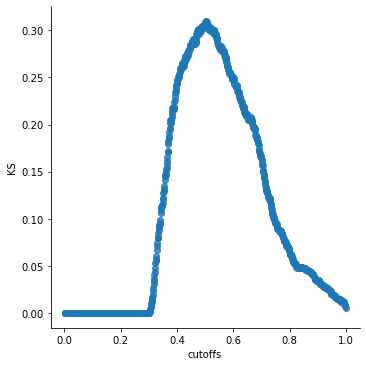

In [119]:
temp=pd.DataFrame({'cutoffs':cutoffs,'KS':KS})
sns.lmplot(x='cutoffs',y='KS',data=temp,fit_reg=False)

In [120]:
cutoffs[KS == max(KS)][0]

0.503

In [129]:
test_hard_classes_1 = (test_prediction>cutoffs[KS == max(KS)][0]).astype(int)

In [124]:
final_prediction = pd.DataFrame({'test_hard_classes' : test_hard_classes})

In [126]:
final_prediction.value_counts()

test_hard_classes
0                    827
1                    604
dtype: int64

In [128]:
final_prediction.to_csv('My_submission_store',index = False)

In [130]:
test_hard_classes_1

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

In [131]:
store_train.shape

(3338, 36)

In [132]:
store_test.shape

(1431, 35)

In [134]:
store_test.shape

(1431, 35)